# Visualização dos Resultados do Algoritmo de Logística

Este notebook apresenta a visualização dos resultados obtidos a partir do processamento do arquivo de entrada.  
Aqui serão exibidas as métricas calculadas, conforme a etapa 1 do trabalho prático, que incluem:
- Quantidade de vértices, arestas e arcos
- Vértices, arestas e arcos requeridos
- Densidade do grafo
- Grau mínimo e máximo
- Intermediação
- Caminho médio e diâmetro

*Observação:* Nesta etapa, os dados de entrada lidos são os mesmos gerados pela execução do código C++ e salvos em um arquivo TXT.


## Contextualização

No trabalho prático, o arquivo de entrada original contém todas as informações necessárias para a construção e análise do grafo.  
No entanto, nesta etapa, o arquivo que utilizaremos já contém apenas as métricas calculadas, e não a estrutura completa do grafo.  
Portanto, a visualização se concentrará na exibição dos resultados agregados.

## Objetivos
- Ler o arquivo TXT com as métricas.
- Exibir os dados de forma organizada.
- Permitir a verificação dos resultados obtidos pelo algoritmo.


## Bibliotecas Utilizadas:

In [1]:
import matplotlib.pyplot as plt
import numpy as n
import seaborn as sns
import re
import pandas as pd

# Criação de uma função para tratar os dados obtidos

Nesta célula é criada uma função que lê os dados do arquivo .txt e cria uma representação em dicionário, convertendo os valores numéricos para tipos apropriados. Realizando o tratamento dos dados recebidos e os armazenando.

In [2]:
def parse_metrics(filename):
 
    metrics = {}
    in_intermedio = False
    current_metric_key = None

    with open(filename, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.rstrip('\n')
            if not line.strip():
                continue  

            match_metrica = re.match(r'^(\d+)\.\s*(.*?):\s*(.*)$', line)
            if match_metrica:
                # É uma nova métrica
                in_intermedio = False
                indice = match_metrica.group(1)
                metrica = match_metrica.group(2).strip()
                valor = match_metrica.group(3).strip()
                
                if metrica.lower() == "intermediação" and not valor:
                    metrics["Intermediação"] = {}
                    current_metric_key = "Intermediação"
                    in_intermedio = True
                    continue
                
                val_conv = None
                if valor:
                    if valor.endswith("%"):
                        try:
                            val_conv = float(valor[:-1].strip())
                        except:
                            val_conv = valor
                    else:

                        try:
                            if '.' in valor:
                                val_conv = float(valor)
                            else:
                                val_conv = int(valor)
                        except:
                            val_conv = valor
                else:
                    val_conv = ""
                
                metrics[metrica] = val_conv
                current_metric_key = metrica
                continue
            

            if in_intermedio and current_metric_key == "Intermediação":
                pairs = re.findall(r'(\d+):\s*([\d\.]+)', line)
                if not pairs:
                    in_intermedio = False
                else:
                    # Grava cada par no dicionário de intermediação
                    for node_str, val_str in pairs:
                        try:
                            node_int = int(node_str)
                            val_float = float(val_str)
                        except:
                            node_int, val_float = None, 0.0
                        if node_int is not None:
                            metrics["Intermediação"][node_int] = val_float
                continue
    return metrics


# Utilização da função e Visualização das métricas

Aqui a função definida anteriormente é chamada e recebe como parâmetro o arquivo resultados.txt que contém os dados obtidos através dos cálculos, e em seguida as suas métricas são exibidas.

In [3]:
metrics = parse_metrics("results/resultados.txt")

# Criar DataFrame com as métricas gerais (excluindo a intermediação)
general_keys = [key for key in metrics.keys() if key.lower() not in ["intermediação", "intermediacao"]]
df_general = pd.DataFrame([(k, metrics[k]) for k in general_keys], columns=["Métrica", "Valor"])
print("DataFrame de Métricas Gerais:")
print(df_general)

DataFrame de Métricas Gerais:
                Métrica   Valor
0              Vértices   43.00
1               Arestas    2.00
2                 Arcos  129.00
3   Vértices requeridos   38.00
4    Arestas requeridas    2.00
5      Arcos requeridos   33.00
6             Densidade    7.36
7           Grau mínimo    2.00
8           Grau máximo    8.00
9         Caminho médio  130.03
10             Diâmetro  334.00


## Visualização das Intermediações

In [4]:

items = list(metrics["Intermediação"].items())

for item in items:
    if len(item) != 2:
        print("Item com formato inesperado:", item)

filtered_items = [item for item in items if len(item) == 2]

intermed_converted = {}
for k, v in filtered_items:
    if isinstance(k, str) and k.isdigit():
        intermed_converted[int(k)] = v
    else:
        intermed_converted[k] = v
df_intermed = pd.DataFrame(list(intermed_converted.items()), columns=["Vértice", "Intermediação"])

df_intermed = df_intermed.sort_values(by="Intermediação", ascending=False)
print("\nDataFrame de Intermediação:")
print(df_intermed)
print(df_intermed.to_string(index=False))


DataFrame de Intermediação:
    Vértice  Intermediação
6        15          498.0
15       23          443.0
7        16          405.0
8        17          371.0
4        13          317.0
24       31          309.0
27       34          308.0
26       33          295.0
5        14          295.0
23       30          280.0
3        12          261.0
14       22          233.0
16       24          230.0
39        6          176.0
38        5          171.0
9        18          155.0
33        4          150.0
32       39          147.0
18       26          141.0
28       35          129.0
42        9          123.0
31       38           97.0
2        11           96.0
21       29           88.0
17       25           87.0
12       20           85.0
35       41           85.0
20       28           81.0
36       42           81.0
34       40           81.0
40        7           71.0
19       27           71.0
13       21           70.0
25       32           70.0
29       36           58.0

## Representações Visuais da métricas obtidas

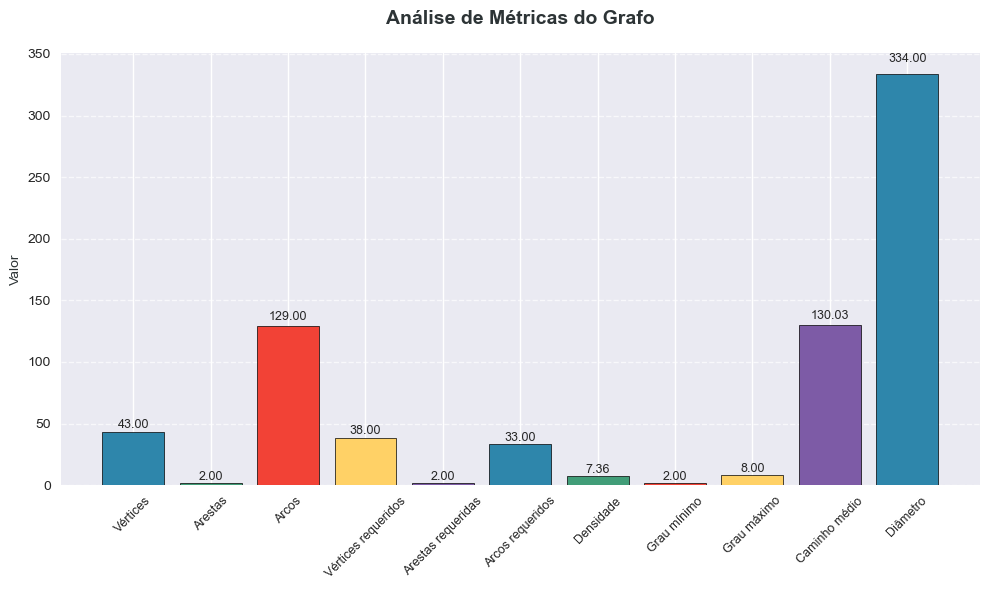

In [5]:
plt.style.use('seaborn-v0_8')  # Ou outro estilo da lista impressa
sns.set_palette("husl")
colors = ['#2E86AB', '#419D78', '#F24236', '#FFD166', '#7D5BA6']
font_title = {'fontsize': 14, 'fontweight': 'bold', 'color': '#2d3436'}
font_labels = {'fontsize': 10, 'color': '#2d3436'}

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(df_general["Métrica"], df_general["Valor"], 
            color=colors, 
            edgecolor='black',
            linewidth=0.5)

ax.set_title("Análise de Métricas do Grafo\n", **font_title)
ax.set_ylabel("Valor", **font_labels)
ax.tick_params(axis='x', rotation=45, labelsize=9)
ax.grid(axis='y', linestyle='--', alpha=0.7)


for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, 
            height + 0.02*height,  # Offset proporcional
            f'{height:.2f}', 
            ha='center', 
            va='bottom',
            fontsize=9)

plt.tight_layout()
plt.show()

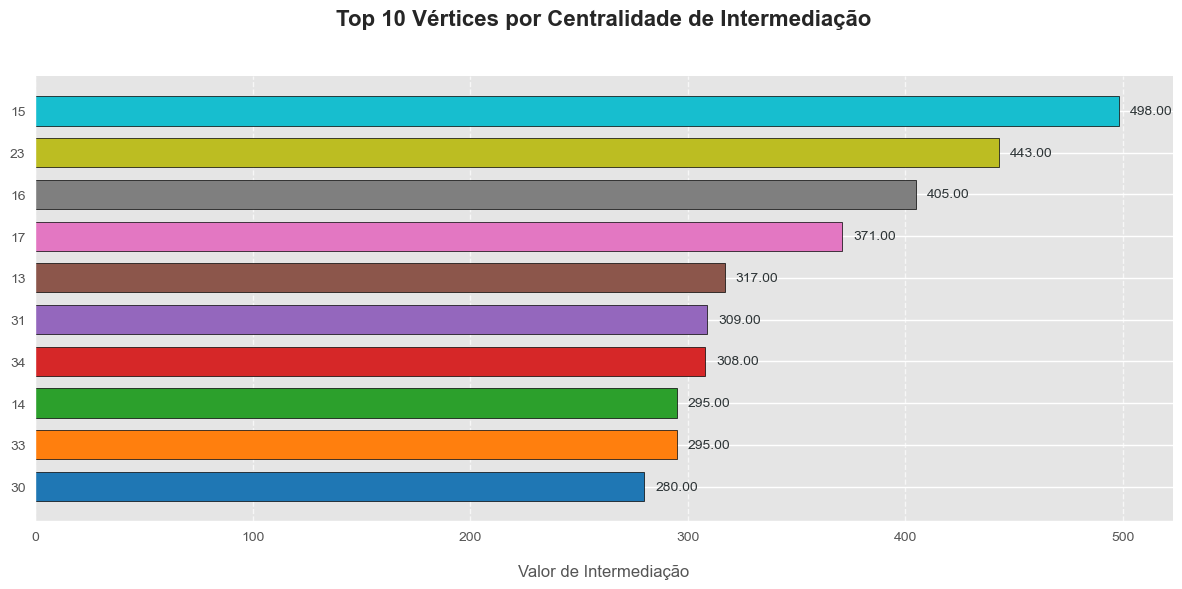

In [6]:
def plot_intermediacao_pro(df_intermed):
    try:
        plt.style.use('ggplot')
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
        
        top10 = df_intermed.head(10).sort_values('Intermediação', ascending=True)
        fig, ax = plt.subplots(figsize=(12, 6))
        
        bars = ax.barh(top10['Vértice'].astype(str), 
                     top10['Intermediação'], 
                     color=colors,
                     edgecolor='black',
                     height=0.7)
        
        ax.set_title('Top 10 Vértices por Centralidade de Intermediação\n', 
                   fontsize=16, fontweight='bold', pad=20)
        ax.set_xlabel('Valor de Intermediação', fontsize=12, labelpad=15)
        ax.xaxis.set_tick_params(labelsize=10)
        ax.yaxis.set_tick_params(labelsize=10)
    
        for bar in bars:
            width = bar.get_width()
            ax.text(width + (top10['Intermediação'].max() * 0.01),
                    bar.get_y() + bar.get_height()/2,
                    f'{width:.2f}',
                    va='center', ha='left',
                    fontsize=10, color='#2d3436')
        
        ax.grid(axis='x', linestyle='--', alpha=0.7)
        ax.spines[['top', 'right']].set_visible(False)
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Erro ao gerar gráfico: {str(e)}")
        print("Verifique se o DataFrame contém dados válidos na coluna 'Intermediação'")

if not df_intermed.empty:
    plot_intermediacao_pro(df_intermed)
else:
    print("Dados de intermediação não disponíveis para plotagem")

## Conclusão

Neste notebook, os resultados do pré-processamento dos dados foram apresentados de forma organizada.  
A abordagem permite a visualização rápida das principais métricas calculadas pelo algoritmo, facilitando a análise dos resultados.  
